Importing Libraries 

In [47]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline 

Loading the Dataset 

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

Reading the Dataset 

In [4]:
train.shape

(12980, 12)

In [5]:
test.shape

(4399, 11)

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [8]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [10]:
train.isnull().sum()                          # cleaned dataset 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In Train dataset there are 12 Columns while in Test dataset there are 11 Columns . Hence, the missing variable in Test dataset is DEPENDENT VARIAVLE( The variavble we are trying to Predict )  

In [11]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

UNIVARIATE ANALYSIS 

In [12]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


<Axes: ylabel='Frequency'>

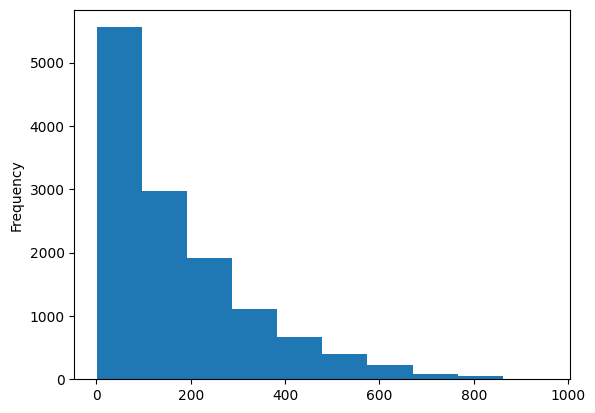

In [13]:
train['count'].plot.hist()

The distribution is skewed towards right and hence we can take log of the variable and see if the distribution becomes normal.
(VARIABLE TRANSFORMATION)

<Axes: ylabel='Frequency'>

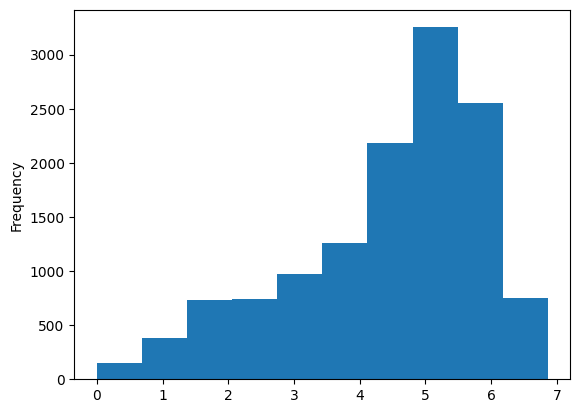

In [14]:
np.log(train['count']).plot.hist()

Now the distribution looks less skewed

Let's now explore the  idendependent variables to have a better understanding of the dataset. 

<Axes: ylabel='Frequency'>

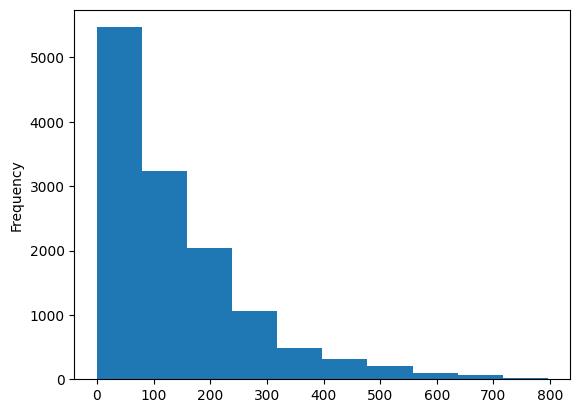

In [15]:
train['registered'].plot.hist()

<Axes: ylabel='Frequency'>

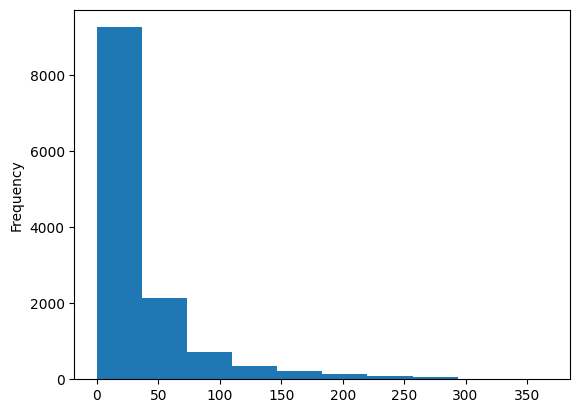

In [16]:
train['casual'].plot.hist()

<Axes: ylabel='Frequency'>

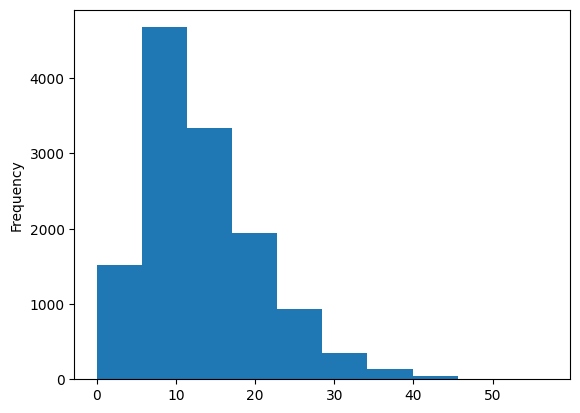

In [66]:
train['windspeed'].plot.hist()

<Axes: ylabel='Frequency'>

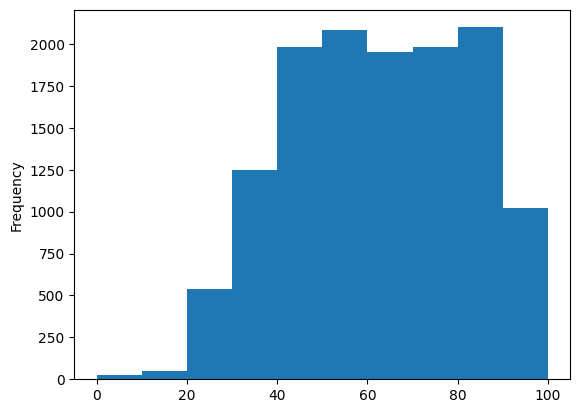

In [67]:
train['humidity'].plot.hist()

<Axes: ylabel='Frequency'>

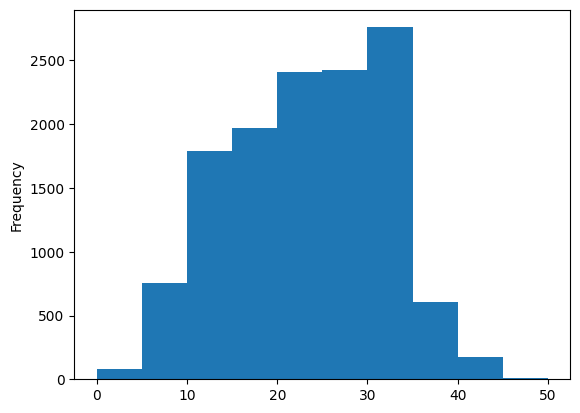

In [68]:
train['atemp'].plot.hist()

<Axes: ylabel='Frequency'>

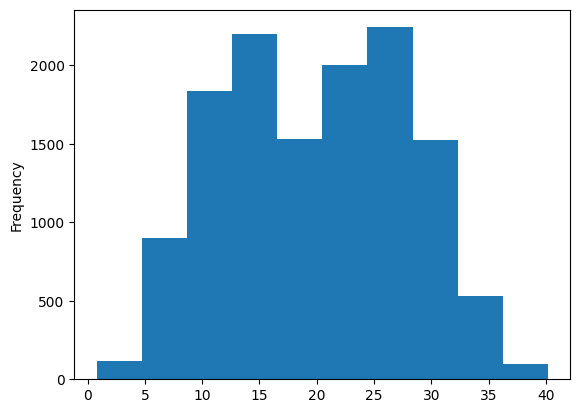

In [69]:
train['temp'].plot.hist()

<Axes: ylabel='Frequency'>

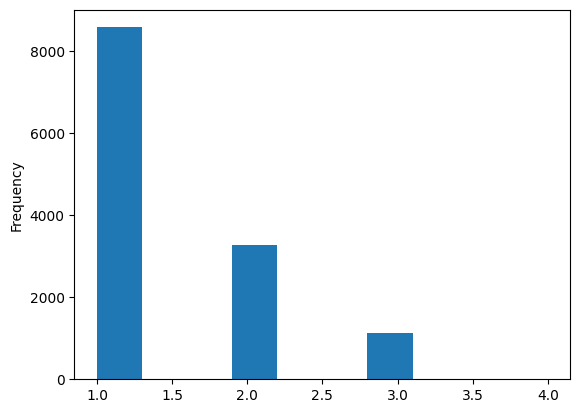

In [70]:
train['weather'].plot.hist()

<Axes: ylabel='Frequency'>

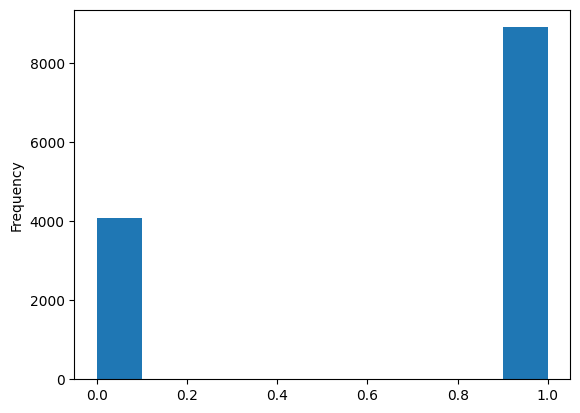

In [71]:
train['workingday'].plot.hist()

<Axes: ylabel='Frequency'>

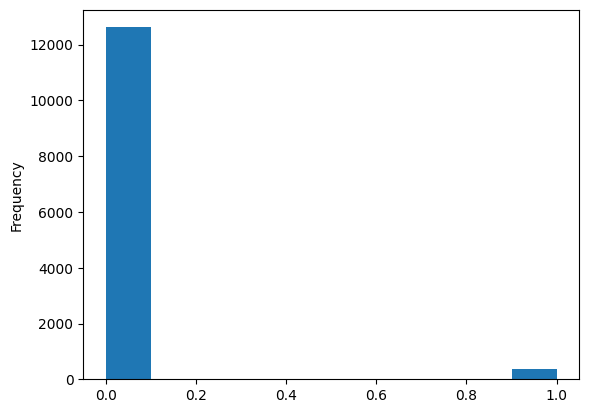

In [72]:
train['holiday'].plot.hist()

<Axes: ylabel='Frequency'>

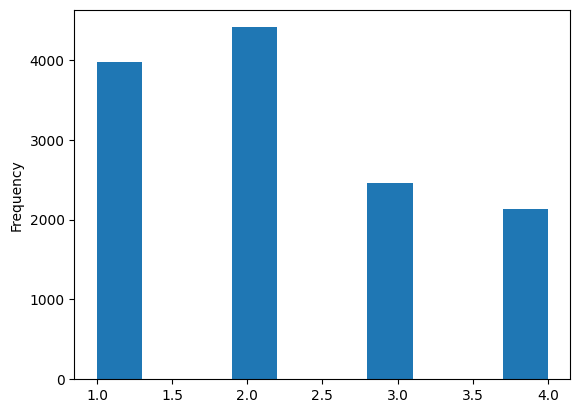

In [73]:
train['season'].plot.hist()

Let's now look at how correlated our numerical variables are. 

We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable.

BIVARIATE ANALYSIS

(<Axes: xlabel='count', ylabel='registered'>,
 <Axes: xlabel='count', ylabel='casual'>,
 <Axes: xlabel='count', ylabel='windspeed'>,
 <Axes: xlabel='count', ylabel='humidity'>,
 <Axes: xlabel='count', ylabel='atemp'>,
 <Axes: xlabel='count', ylabel='temp'>,
 <Axes: xlabel='count', ylabel='weather'>,
 <Axes: xlabel='count', ylabel='workingday'>,
 <Axes: xlabel='count', ylabel='holiday'>,
 <Axes: xlabel='count', ylabel='season'>)

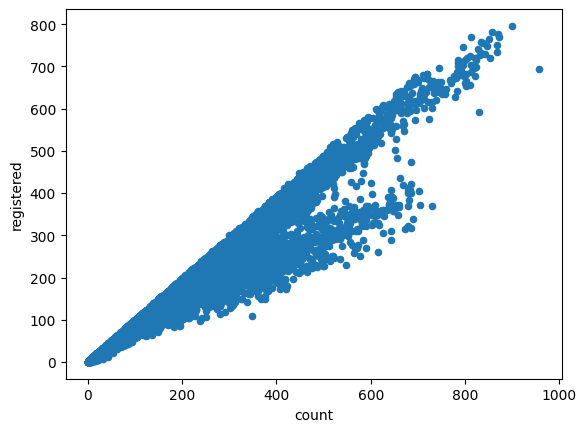

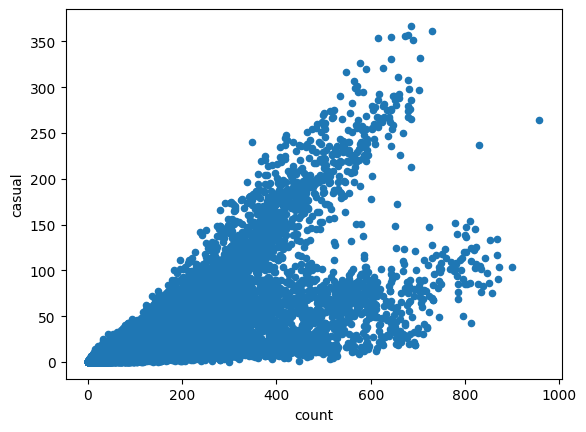

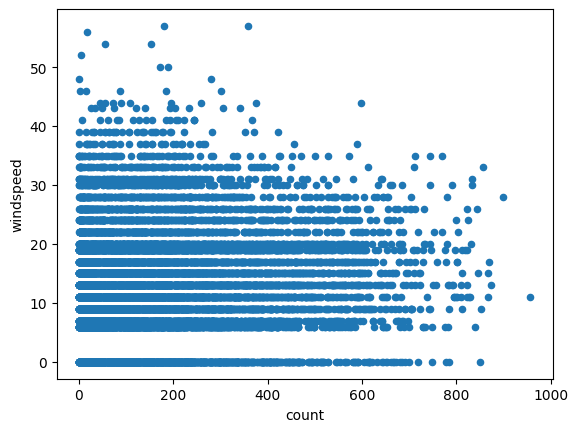

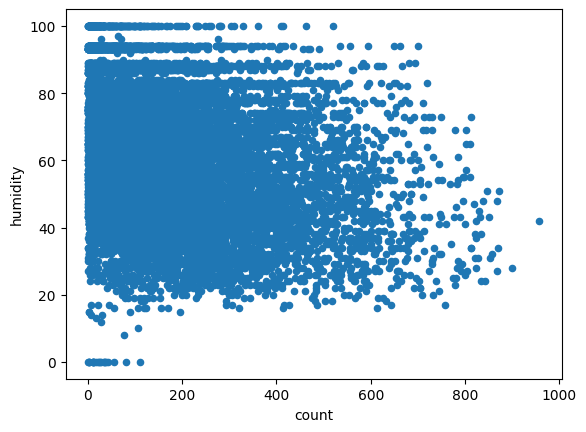

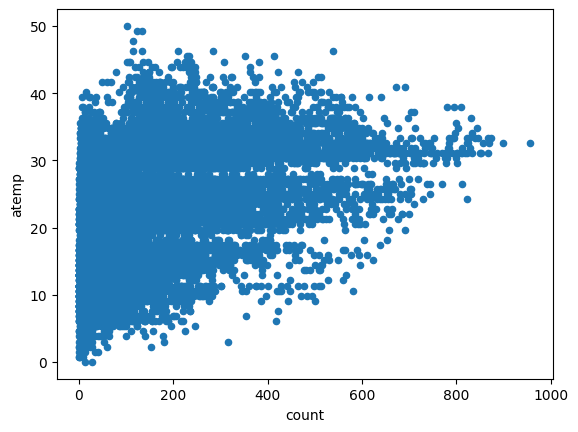

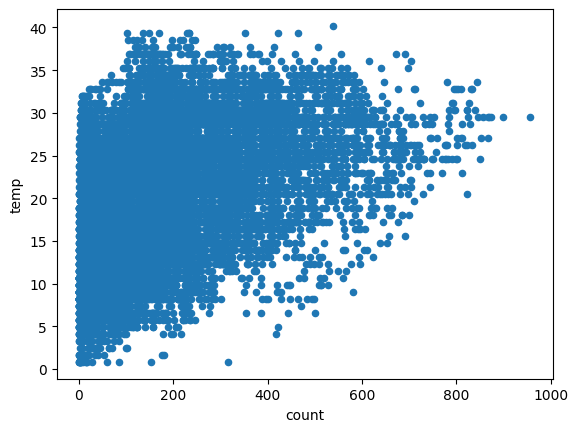

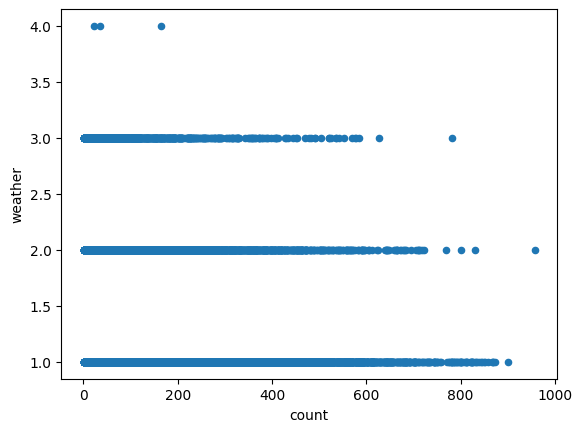

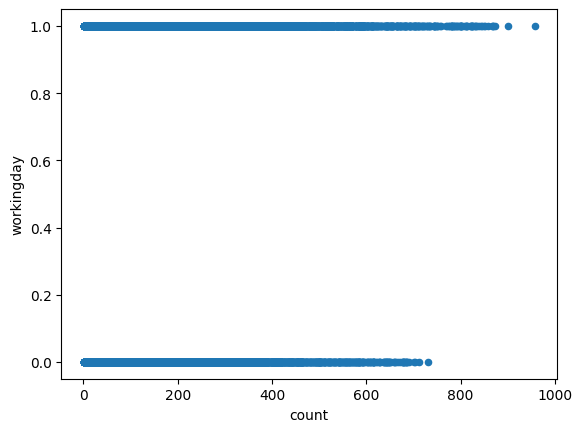

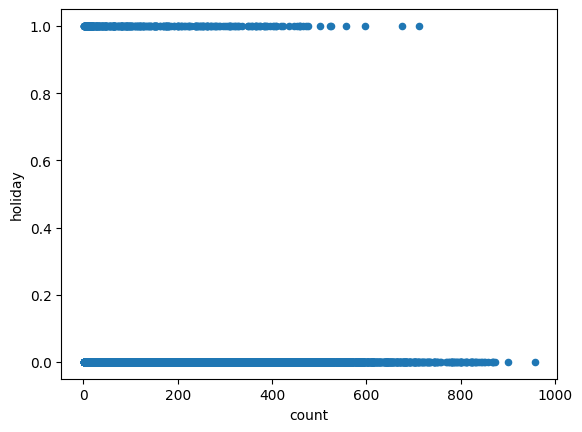

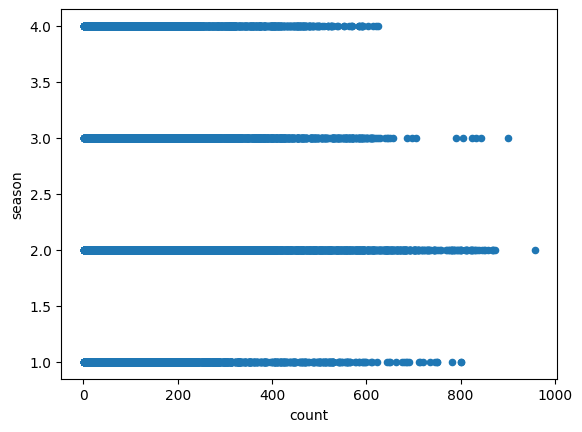

In [17]:
train.plot.scatter('count','registered'), train.plot.scatter('count','casual'), train.plot.scatter('count','windspeed'), train.plot.scatter('count','humidity'),train.plot.scatter('count','atemp'), train.plot.scatter('count','temp'), train.plot.scatter('count','weather'), train.plot.scatter('count','workingday'), train.plot.scatter('count','holiday'), train.plot.scatter('count','season')

CORRERLATION Between Variables 

<Axes: >

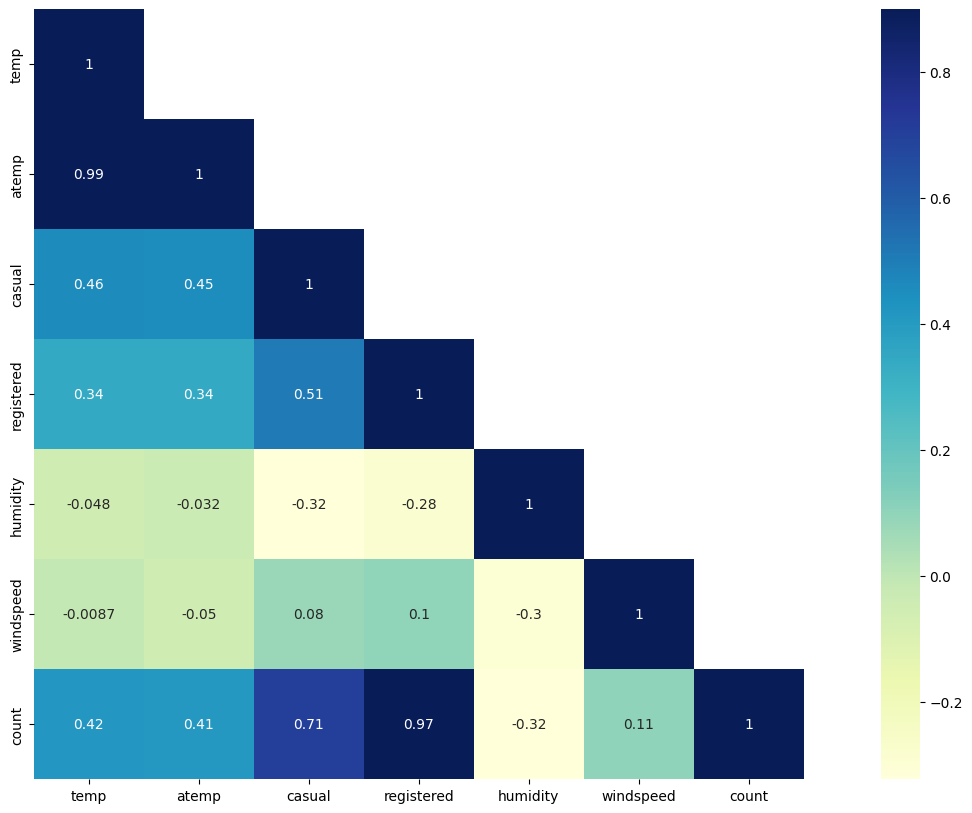

In [18]:
# looking at the correlation between numerical variables
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Some of the inferences from the above correlation map are:

1. temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".

2. windspeed will not be really useful numerical feature and it is visible from it correlation value with "count"

3. Since "atemp" and "temp" has got strong correlation with each other, during model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

let's first extract some new features using the datetime variable. We can extract the date, hour, month.

In [19]:
from datetime import datetime
from datetime import date
import calendar

You can also use to_datetime() function from pandas package to convert the date in datetime format and then extract features from it. 

In [20]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [21]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

Let's now build a linear regression model to get the predictions on the test data. We have to make the similar changes in test data as we have done for the training data.

Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set.

In [22]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

 We will drop the datetime, date variable as we have already extracted features from these variables.
 
 We will also drop the atemp variable as we saw that it is highly correlated with the temp variable.

In [25]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

# Model Building
### Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# initialize the linear regression model
lnrg = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [27]:
X_train = training.drop(['count'], axis=1 )

In [28]:
y_train = np.log(training['count'])

In [29]:
X_val = validation.drop(['count'], axis=1)

In [30]:
y_val = np.log(validation['count'])

In [31]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [33]:
# fitting the model on X_train and y_train
lnrg.fit(X_train,y_train)

LinearRegression()

Now we have a trained linear regression model with us. We will now make prediction on the X_val set and check the performance of our model. Since the evaluation metric for this problem is RMSLE, we will define a model which will return the RMSLE score.

In [34]:
# making prediction on validation set
prediction = lnrg.predict(X_val)

In [35]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

Let's now calculate the rmsle value of the predictions

In [36]:
rmsle(y_val,prediction)

0.8875379204281776

In [37]:
test_prediction = lnrg.predict(test)

We got a rmsle value of 0.8875 on the validation set.

Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=5)

Let's fit the decision tree model now.

In [41]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

Its time to make prediction on the validation set using the trained decision tree model.

In [42]:
predict = dt_reg.predict(X_val)

In [43]:
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.17102267399447055

In [44]:
test_prediction = dt_reg.predict(test)

These are the log values and we have to convert them back to the original scale. 

In [45]:
final_prediction = np.exp(test_prediction)

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [46]:
submission = pd.DataFrame()

In [47]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [48]:
submission.to_csv('submission.csv', header=True, index=False)